In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

#使用中文字体
mpl.rcParams['font.family']=['Microsoft Yahei','sans-serif']
mpl.rcParams['axes.unicode_minus']=False

#使用svg格式，避免图形模糊
%matplotlib inline
%config InlineBackend.figure_format="svg"

In [10]:
import pandas as pd
df=pd.read_csv("house-prices.csv")
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [11]:
df["SqFt"].describe()

count     128.000000
mean     2000.937500
std       211.572431
min      1450.000000
25%      1880.000000
50%      2000.000000
75%      2140.000000
max      2590.000000
Name: SqFt, dtype: float64

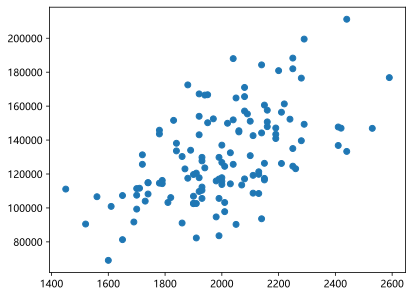

In [12]:
plt.scatter("SqFt","Price",data=df)
plt.show()

# 协方差分析

In [13]:
from statsmodels.formula.api import ols
model = ols("Price ~ SqFt + C(Brick) * C(Neighborhood)",data=df)
lm = model.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     79.95
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           9.80e-40
Time:                        16:35:09   Log-Likelihood:                -1384.0
No. Observations:                 128   AIC:                             2782.
Df Residuals:                     121   BIC:                             2802.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 2.656e+04   1.12e+04      2.363      0.020    4302.535    4.88e+04
C(Brick)[T.Yes]                           1.637e+04   3732.222      4.387      0.000    8984.782    2.38e+04
C(Neighborhood)[T.North]                 -5820.5914   3187.082     -1.826      0.070   -1.21e+04     489.078
C(Neighborhood)[T.West]                    2.72e+04   3558.354      7.645      0.000    2.02e+04    3.42e+04
C(Brick)[T.Yes]:C(Neighborhood)[T.North] -3267.0309   6335.286     -0.516      0.607   -1.58e+04    9275.340
C(Brick)[T.Yes]:C(Neighborhood)[T.West]   9786.1514   5484.760      1.784      0.077   -1072.378    2.06e+04
SqFt                                        45.5619      5.484      8.308      0.000      34.705      56.419
==============================================================================
Omnibus:                        2.392   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.302   Jarque-Bera (JB):                1.905
Skew:                           0.194   Prob(JB):                        0.386
Kurtosis:                       3.454   Cond. No.                     2.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
from statsmodels.stats.anova import anova_lm
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(Brick),1.0,1.879942e+10,1.879942e+10,123.172133,3.611935e-20
C(Neighborhood),2.0,4.277697e+10,2.138849e+10,140.135506,3.166131e-32
C(Brick):C(Neighborhood),2.0,1.105563e+09,5.527814e+08,3.621776,2.967323e-02
SqFt,1.0,1.053537e+10,1.053537e+10,69.026850,1.635955e-13
Residual,121.0,1.846789e+10,1.526272e+08,NaN,NaN
